In [93]:
#mengimpor library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter


#librari untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [95]:
df= pd.read_csv("spam.csv",sep=',', header=0)
df.head()

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [96]:
df

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."
...,...,...
2631,ham,Pengingat halo semuanya: Vince telah meminta s...
2632,ham,Re: Argentina Power & Gas Market Modeling Oke ...
2633,ham,"Re: Program Enron / Stanford Stinson, hebat! S..."
2634,ham,"Persetujuan untuk peninjau Roberts JR, Michael..."


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  2636 non-null   object
 1   Pesan     2636 non-null   object
dtypes: object(2)
memory usage: 41.3+ KB


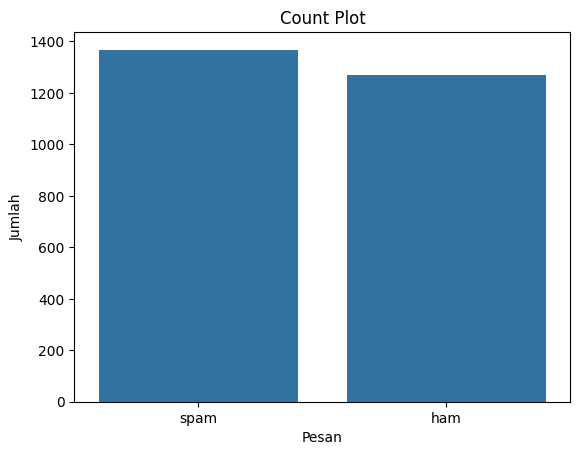

In [98]:
sns.countplot(data=df, x='Kategori')
plt.xlabel('Pesan')
plt.ylabel('Jumlah')
plt.title('Count Plot')
plt.show()

In [99]:
# Pisahkan data fitur (X) dan target (Y).

X = df['Pesan']
Y = df['Kategori']

In [100]:
# Bagi data menjadi set pelatihan dan pengujian

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [101]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2636,)
(2108,)
(528,)


In [102]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)

In [103]:
# Menyesuaikan vektorizer dengan data latih dan mengubahnya menjadi fitur numerik
X_train_features = feature_extraction.fit_transform(X_train)

# Menggunakan vektorizer yang sudah disesuaikan untuk mengubah data uji menjadi fitur numerik
X_test_features = feature_extraction.transform(X_test)

In [104]:
Y_train = Y_train.replace({'ham': 0, 'spam': 1}).infer_objects(copy=False)
Y_test = Y_test.replace({'ham': 0, 'spam': 1}).infer_objects(copy=False)

<ipython-input-104-659db1fc465d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_train = Y_train.replace({'ham': 0, 'spam': 1}).infer_objects(copy=False)
<ipython-input-104-659db1fc465d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_test = Y_test.replace({'ham': 0, 'spam': 1}).infer_objects(copy=False)


In [105]:
Y_train = Y_train.replace({'ham': 0, 'spam': 1})
Y_test = Y_test.replace({'ham': 0, 'spam': 1})

In [106]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [107]:
print(X_train)

2616    Non - Firm Power Curve Building Hai Vince, Ami...
1567    Pres. Untuk Delainy Sorry Vince, silakan gunak...
1189    Salam darimu. A . E Halo sayangku, sebelum say...
1359    Pemerintah memberi Anda $ 25.000! hibah pribad...
567     MSNBC: Tarif mencapai 18 tahun terendah 4. 75 ...
                              ...                        
1638    RODRIGO LAMAS - Harapan terbaik saya ingin men...
1095    Secara alami tak tertahankan identitas perusah...
1130    Med apa pun untuk gadis Anda bahagia! Gadis An...
1294    Patch pembesaran penis baru! Patch pembesaran ...
860     Solusi visual yang sempurna untuk bisnis Anda ...
Name: Pesan, Length: 2108, dtype: object


In [108]:
print(X_train_features)

  (0, 15096)	0.5149063857200802
  (0, 8140)	0.136153572896169
  (0, 17200)	0.04203338125419486
  (0, 5607)	0.0680767864480845
  (0, 4396)	0.063474043334914
  (0, 9033)	0.03530068073551181
  (0, 21865)	0.01968519047634377
  (0, 2616)	0.05098297686015407
  (0, 5706)	0.04561573736710443
  (0, 18716)	0.05933775620303334
  (0, 20512)	0.03655657632951765
  (0, 13515)	0.024619933244940623
  (0, 16658)	0.03133654375965291
  (0, 21557)	0.1071750428670685
  (0, 13099)	0.15982508367997958
  (0, 11680)	0.359724537564107
  (0, 5799)	0.06614286834584696
  (0, 16752)	0.1913832436219345
  (0, 19178)	0.05733675136508372
  (0, 22235)	0.24861832939218878
  (0, 5732)	0.027090086467298526
  (0, 15486)	0.04461995167165139
  (0, 16114)	0.063474043334914
  (0, 8498)	0.050543357973251504
  (0, 5786)	0.20852847119683232
  :	:
  (2107, 19018)	0.1334356501309779
  (2107, 17155)	0.11756822539388882
  (2107, 20839)	0.08375367458761275
  (2107, 21320)	0.10906234191053041
  (2107, 12227)	0.11050052850655567
  (2107, 

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# model Naive Bayes
model = MultinomialNB()

In [111]:
# Latih model pada data pelatihan
model.fit(X_train_features, Y_train)

MultinomialNB()

In [112]:
predictions_test = model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, predictions_test)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

Accuracy on test data: 98.86%


In [113]:
predictions_train = model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train, predictions_train)
print(f'Accuracy on training data: {accuracy_train * 100:.2f}%')

Accuracy on training data: 99.72%


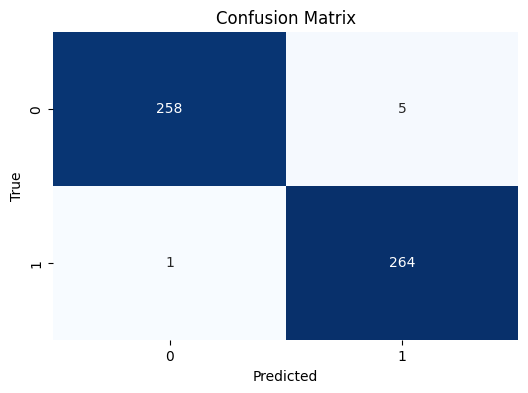

In [114]:
conf_matrix = confusion_matrix(Y_test, predictions_test)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [115]:
classification_rep = classification_report(Y_test, predictions_test, target_names=['Ham', 'Spam'])
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      0.98      0.99       263
        Spam       0.98      1.00      0.99       265

    accuracy                           0.99       528
   macro avg       0.99      0.99      0.99       528
weighted avg       0.99      0.99      0.99       528



In [116]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Hitung metrik
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print("Specificity : ", specificity)


Accuracy :  0.9886363636363636
Precision :  0.9814126394052045
Recall :  0.9962264150943396
Specificity :  0.9809885931558935


In [117]:
def predict_spam_ham(email_text):
    input_data_features = tfidf_vectorizer.transform([email_text])
    prediction = model.predict(input_data_features)
    return "Spam" if prediction[0] == 1 else "Ham"

# Test prediction with new samples
sample_spam = "Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!"
sample_ham = "Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience."

print(f"Sample 1 Prediction: {predict_spam_ham(sample_spam)}")
print(f"Sample 2 Prediction: {predict_spam_ham(sample_ham)}")

Sample 1 Prediction: Spam
Sample 2 Prediction: Ham
